<a href="https://www.kaggle.com/code/kusumakar/customer-satisfaction-eda-deep-learning?scriptVersionId=205548339" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-feedback-and-satisfaction/customer_feedback_satisfaction.csv


<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Load the Data </p></div>

In [2]:
df=pd.read_csv("/kaggle/input/customer-feedback-and-satisfaction/customer_feedback_satisfaction.csv")

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> View the Data </p></div>

In [3]:
df.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Check Nulls in the Data </p></div>

In [4]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64

In [5]:
df.shape

(38444, 11)

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Drop CustomerID from Data </p></div>

In [6]:
df.drop(columns=['CustomerID'],inplace=True)

In [7]:
df.columns

Index(['Age', 'Gender', 'Country', 'Income', 'ProductQuality',
       'ServiceQuality', 'PurchaseFrequency', 'FeedbackScore', 'LoyaltyLevel',
       'SatisfactionScore'],
      dtype='object')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Check for outliers in Data </p></div>

<Axes: >

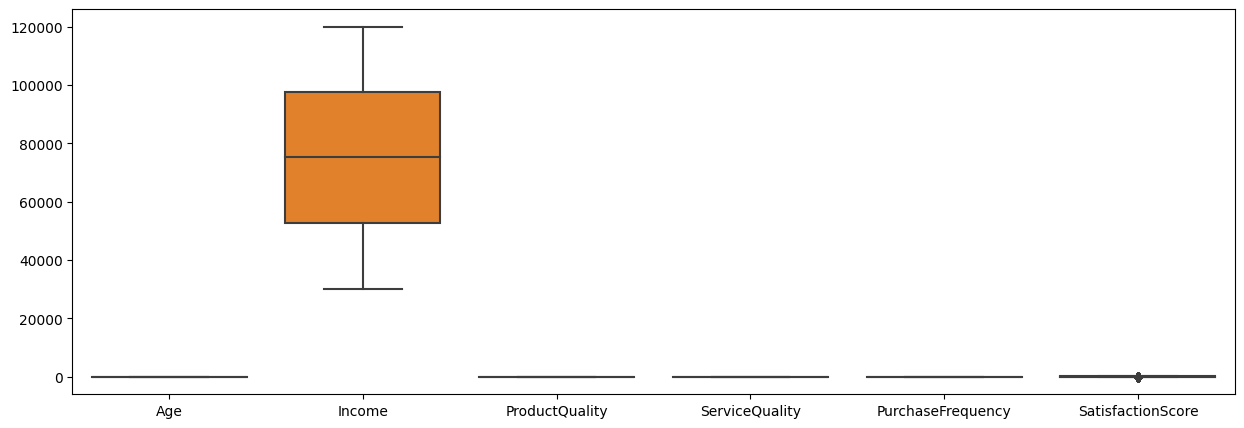

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(df)

<div style="background-color:red; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Above Graph suggests that no outliers are present in the data </p></div>

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Distribution of Age vs SatisfactionScore </p></div>

<Axes: xlabel='SatisfactionScore', ylabel='Age'>

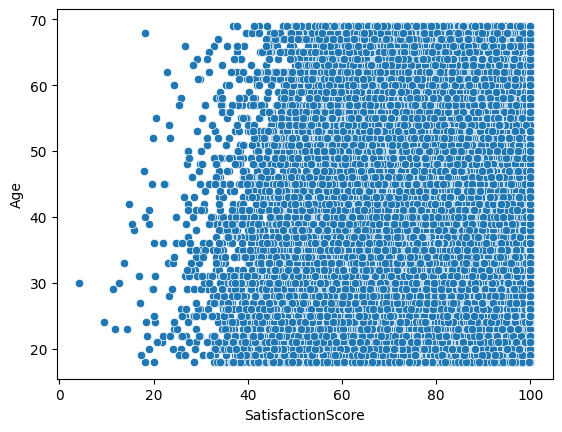

In [10]:
sns.scatterplot(y=df['Age'],x=df['SatisfactionScore'],data=df)

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Gender Vs Satisfaction Score. Overall Satisfaction Score does not have much impact based on Gender </p></div>

<Axes: xlabel='Gender', ylabel='SatisfactionScore'>

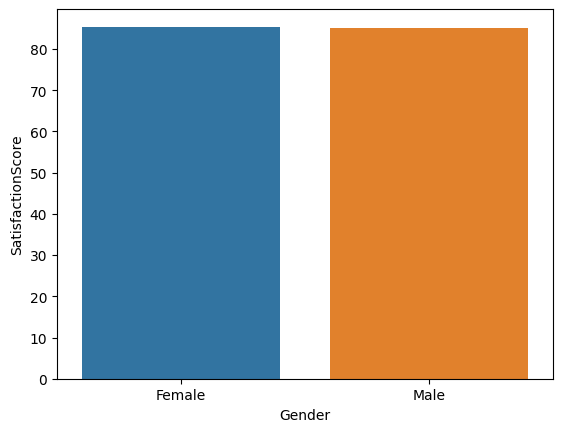

In [11]:
df['Count']=1
df1=df.groupby(['Gender']).agg({"SatisfactionScore":'mean'}).reset_index()
sns.barplot(x='Gender',y='SatisfactionScore',data=df1)

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Country Vs Satisfaction Score ( No Impact Noticed based on Graph below) </p></div>

<Axes: xlabel='Country', ylabel='SatisfactionScore'>

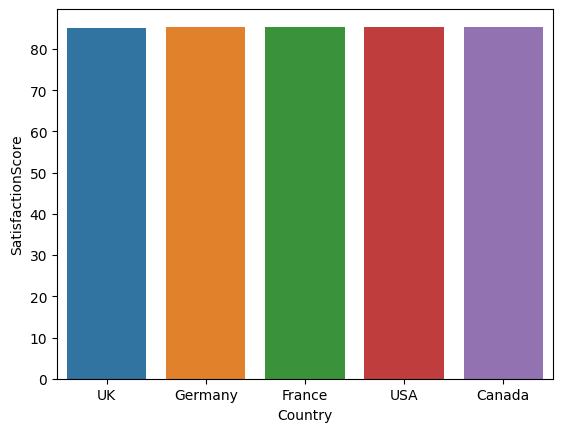

In [12]:
df['Count']=1
df1=df.groupby(['Country']).agg({"SatisfactionScore":'mean'}).reset_index().sort_values(by='SatisfactionScore')
sns.barplot(x='Country',y='SatisfactionScore',data=df1)

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Product Quality vs Satisfaction Score ( Linear Relationship noticed) </p></div>

<Axes: xlabel='ProductQuality', ylabel='SatisfactionScore'>

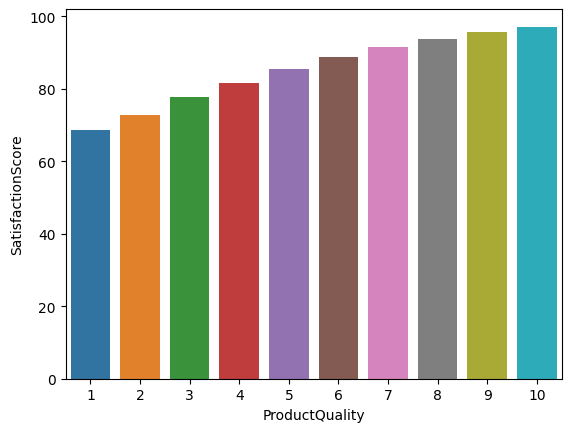

In [13]:
df['Count']=1
df1=df.groupby(['ProductQuality']).agg({"SatisfactionScore":'mean'}).reset_index().sort_values(by='SatisfactionScore')
sns.barplot(x='ProductQuality',y='SatisfactionScore',data=df1)

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white">Service Quality vs Satisfaction Score ( Linear Relationship Noticed) </p></div>

<Axes: xlabel='ServiceQuality', ylabel='SatisfactionScore'>

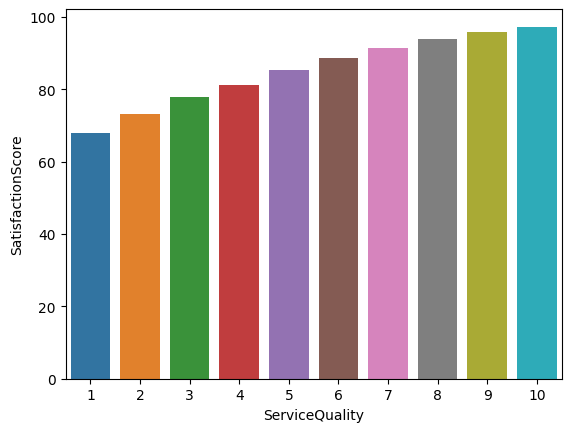

In [14]:
df['Count']=1
df1=df.groupby(['ServiceQuality']).agg({"SatisfactionScore":'mean'}).reset_index().sort_values(by='SatisfactionScore')
sns.barplot(x='ServiceQuality',y='SatisfactionScore',data=df1)

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Purchase Frequency Vs Satisfaction Score </p></div>

<Axes: xlabel='PurchaseFrequency', ylabel='SatisfactionScore'>

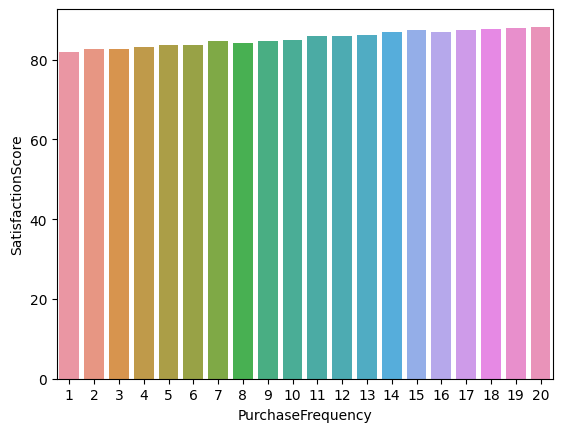

In [15]:
df['Count']=1
df1=df.groupby(['PurchaseFrequency']).agg({"SatisfactionScore":'mean'}).reset_index().sort_values(by='SatisfactionScore')
sns.barplot(x='PurchaseFrequency',y='SatisfactionScore',data=df1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


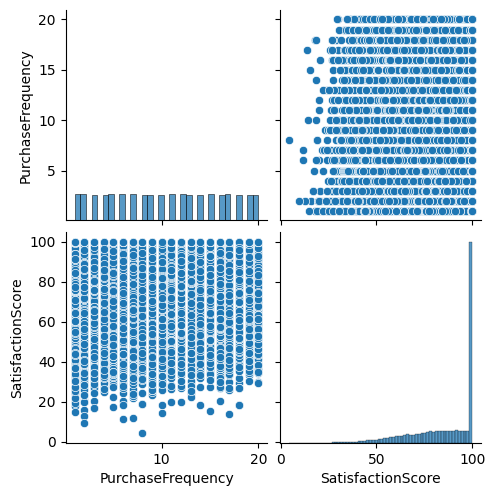

In [16]:
sns.pairplot(df[['PurchaseFrequency','SatisfactionScore']])

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Feedback Score Vs Satisfaction Score </p></div>

<Axes: xlabel='FeedbackScore', ylabel='SatisfactionScore'>

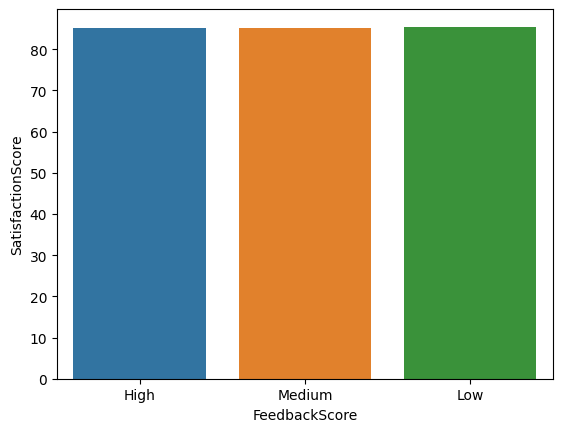

In [17]:
df['Count']=1
df1=df.groupby(['FeedbackScore']).agg({"SatisfactionScore":'mean'}).reset_index().sort_values(by='SatisfactionScore')
sns.barplot(x='FeedbackScore',y='SatisfactionScore',data=df1)

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Loyalty Levels Vs Satisfaction Score</p></div>

<Axes: xlabel='LoyaltyLevel', ylabel='SatisfactionScore'>

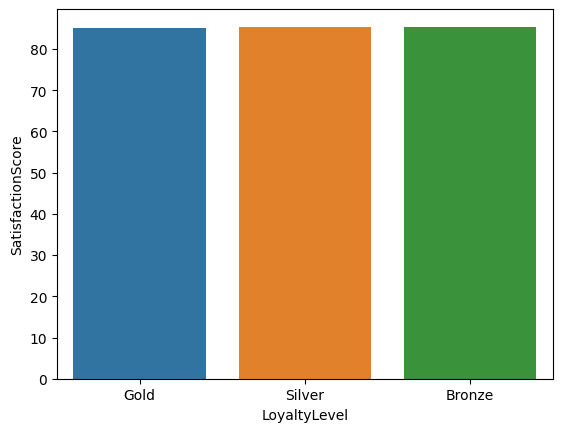

In [18]:
df['Count']=1
df1=df.groupby(['LoyaltyLevel']).agg({"SatisfactionScore":'mean'}).reset_index().sort_values(by='SatisfactionScore')
sns.barplot(x='LoyaltyLevel',y='SatisfactionScore',data=df1)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
features = ['Age','ProductQuality','ServiceQuality']
target='SatisfactionScore'
X=df[features]
Y=df[target]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)


<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Standardize  Data </p></div>

In [21]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [22]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


In [23]:
model = Sequential([

    Dense(64,activation='relu',input_shape=(X_train_transformed.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1) 
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(loss='mae',metrics=['mae'],optimizer='adam')

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

# Create the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # metric to monitor
    patience=5,           # number of epochs to wait before stopping
    restore_best_weights=True  # restores weights from the epoch with the best performance
)

In [27]:
history = model.fit(X_train_transformed, Y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1,callbacks=[early_stopping])


Epoch 1/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 49.8501 - mae: 49.8501 - val_loss: 8.7816 - val_mae: 8.7816
Epoch 2/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1544 - mae: 8.1544 - val_loss: 6.9405 - val_mae: 6.9405
Epoch 3/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8688 - mae: 6.8688 - val_loss: 6.4338 - val_mae: 6.4338
Epoch 4/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4584 - mae: 6.4584 - val_loss: 6.3090 - val_mae: 6.3090
Epoch 5/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3942 - mae: 6.3942 - val_loss: 6.2612 - val_mae: 6.2612
Epoch 6/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3894 - mae: 6.3894 - val_loss: 6.2672 - val_mae: 6.2672
Epoch 7/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4176 - mae: 6.4176 - val_loss: 6.2582 - val_mae: 6.2582
Epoch 8/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4056 - mae: 6.4056 - val_loss: 6.2495 - val_mae: 6.2495
Epoch 9/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 2m

In [28]:
predictions = model.predict(X_test_transformed)


301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


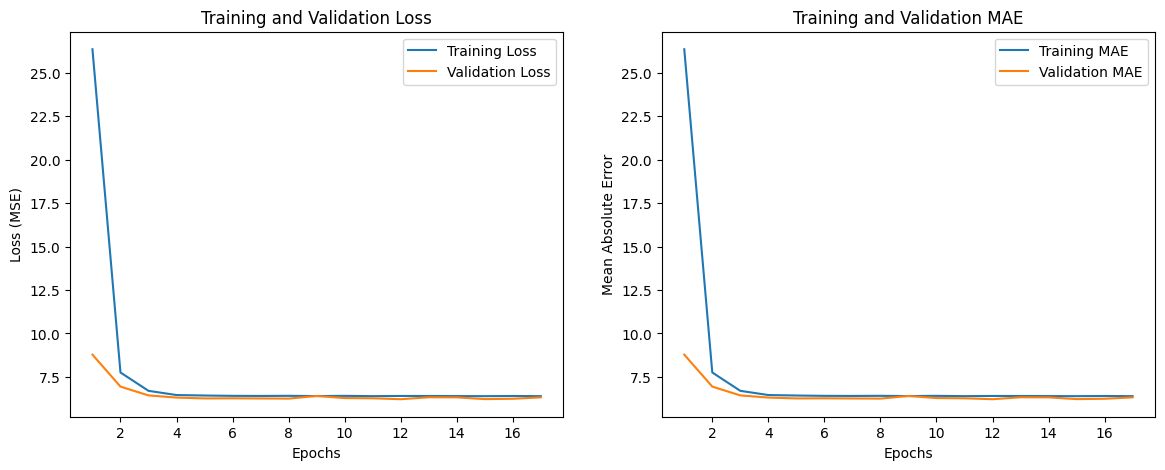

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# Create a range for epochs
epochs = range(1, len(loss) + 1)

# Plot the loss over epochs
plt.figure(figsize=(14, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [30]:
# Final Mean Absolute Error
mean_absolute_error(Y_test,predictions)

6.322510226722712

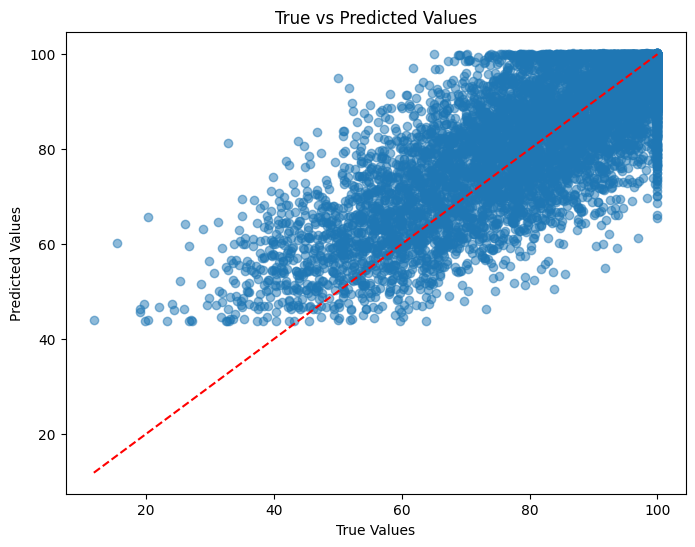

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, predictions, alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()